In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
!mkdir -p /root/.kaggle/
!mv kaggle.json /root/.kaggle/
import kaggle

In [ ]:
! kaggle datasets download -d sudhanvahg/wind-turbine-power-generation-forecasting

Dataset URL: https://www.kaggle.com/datasets/sudhanvahg/wind-turbine-power-generation-forecasting
License(s): CC0-1.0
  0% 0.00/4.37M [00:00<?, ?B/s]
100% 4.37M/4.37M [00:00<00:00, 88.4MB/s]


In [ ]:
! unzip wind-turbine-power-generation-forecasting.zip

Archive:  wind-turbine-power-generation-forecasting.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: column_info.csv         


In [ ]:
df=pd.read_csv("Train.csv")

In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power
0,0,02-01-2013 00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496
1,1,02-01-2013 01:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396
2,2,02-01-2013 02:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396
3,3,02-01-2013 03:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296
4,4,02-01-2013 04:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296


In [ ]:
dl=pd.read_csv("column_info.csv")

In [ ]:
dl.head(10)

,Variables Description,Unnamed: 1
0,Time,Readings timestamp
1,Temp_2m,Temperature at 2 mtrs above surface
2,RelHum_2m,Relative Humidity at 2 mtrs above surface
3,DP_2m,Dew Point at 3 mtrs above surface
4,WS_10m,Wind Speed at 10 mtrs above surface
5,WS_100m,Wind Speed at 100 mtrs above surface
6,WD_10m,Wind Direction at 10 mtrs above surface
7,WD_100m,Wind Direction at 100 mtrs above surface
8,WG_10m,Wind Gusts at 100 mtrs above surface
9,Power,"Turbine power generation, normalized between 0..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  140160 non-null  int64  
 1   Time        140160 non-null  object 
 2   Location    140160 non-null  int64  
 3   Temp_2m     140160 non-null  float64
 4   RelHum_2m   140160 non-null  float64
 5   DP_2m       140160 non-null  float64
 6   WS_10m      140160 non-null  float64
 7   WS_100m     140160 non-null  float64
 8   WD_10m      140160 non-null  float64
 9   WD_100m     140160 non-null  float64
 10  WG_10m      140160 non-null  float64
 11  Power       140160 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 12.8+ MB


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  140160 non-null  int64         
 1   Time        140160 non-null  datetime64[ns]
 2   Location    140160 non-null  int64         
 3   Temp_2m     140160 non-null  float64       
 4   RelHum_2m   140160 non-null  float64       
 5   DP_2m       140160 non-null  float64       
 6   WS_10m      140160 non-null  float64       
 7   WS_100m     140160 non-null  float64       
 8   WD_10m      140160 non-null  float64       
 9   WD_100m     140160 non-null  float64       
 10  WG_10m      140160 non-null  float64       
 11  Power       140160 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 12.8 MB


In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296


In [ ]:
df["Date"]=df["Time"].dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  140160 non-null  int64         
 1   Time        140160 non-null  datetime64[ns]
 2   Location    140160 non-null  int64         
 3   Temp_2m     140160 non-null  float64       
 4   RelHum_2m   140160 non-null  float64       
 5   DP_2m       140160 non-null  float64       
 6   WS_10m      140160 non-null  float64       
 7   WS_100m     140160 non-null  float64       
 8   WD_10m      140160 non-null  float64       
 9   WD_100m     140160 non-null  float64       
 10  WG_10m      140160 non-null  float64       
 11  Power       140160 non-null  float64       
 12  Date        140160 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 13.9+ MB


In [ ]:
df["Hour"]=df["Time"].dt.hour

In [ ]:
df.head(1)

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour
0,0,2013-01-02,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  140160 non-null  int64         
 1   Time        140160 non-null  datetime64[ns]
 2   Location    140160 non-null  int64         
 3   Temp_2m     140160 non-null  float64       
 4   RelHum_2m   140160 non-null  float64       
 5   DP_2m       140160 non-null  float64       
 6   WS_10m      140160 non-null  float64       
 7   WS_100m     140160 non-null  float64       
 8   WD_10m      140160 non-null  float64       
 9   WD_100m     140160 non-null  float64       
 10  WG_10m      140160 non-null  float64       
 11  Power       140160 non-null  float64       
 12  Date        140160 non-null  object        
 13  Hour        140160 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(2), object(1)
memory usage: 14.4+ MB


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df["Year"]=df["Date"].dt.year

In [ ]:
df["Month"]=df["Date"].dt.month

In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0,2013,1
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,2013-01-02,1,2013,1
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2013-01-02,2,2013,1
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,2013-01-02,3,2013,1
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,2013-01-02,4,2013,1


Yearwise Power Distribution.

In [ ]:
year_wise=df.groupby ("Year")["Power"].sum().reset_index()

In [ ]:
year_wise .head()

,Year,Power
0,2013,12075.467541
1,2014,11022.104947
2,2015,11130.328048
3,2016,9563.305259


Text(0.5, 1.0, 'Power Distribution Per Year')

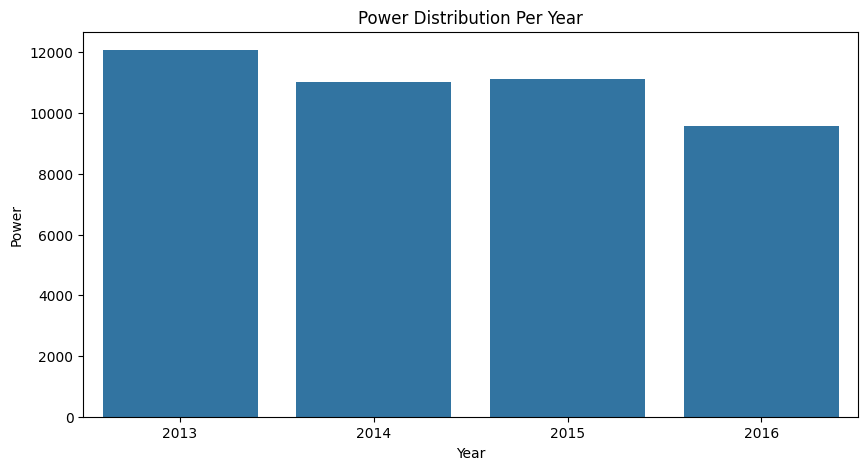

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Year",y="Power",data=year_wise)
plt.xlabel("Year")
plt.ylabel("Power")
plt.title("Power Distribution Per Year")

In [ ]:
month_wise=df.groupby ("Month")["Power"].sum().reset_index()

In [ ]:
month_wise.head()

,Month,Power
0,1,4281.376322
1,2,4300.885872
2,3,4474.172527
3,4,3935.090509
4,5,3430.026928


Text(0.5, 1.0, 'Power Distribution Per Month')

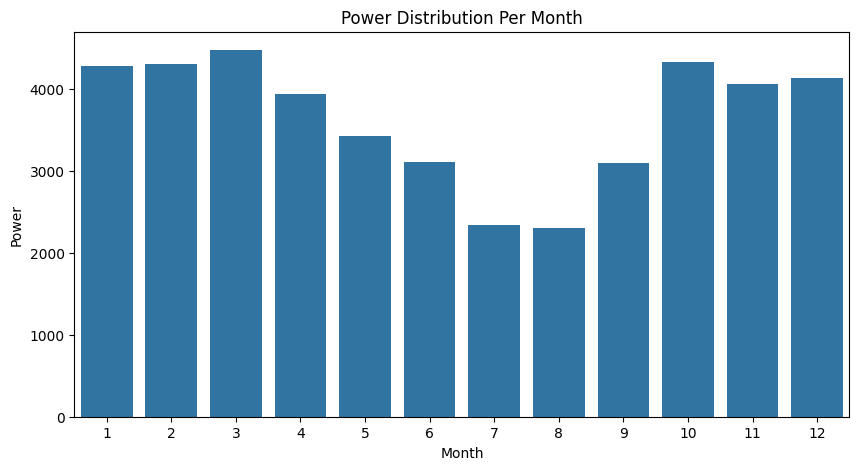

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Month",y="Power",data=month_wise)
plt.xlabel("Month")
plt.ylabel("Power")
plt.title("Power Distribution Per Month")

Monthly power distribution for each year


In [ ]:
monthly_power = df.groupby(['Year', 'Month'])['Power'].sum().reset_index()

In [ ]:
monthly_power.head()

,Year,Month,Power
0,2013,1,972.439452
1,2013,2,1205.913442
2,2013,3,1213.398057
3,2013,4,1065.896252
4,2013,5,1052.661257


Text(0.5, 1.0, 'Power distribution per month for each year')

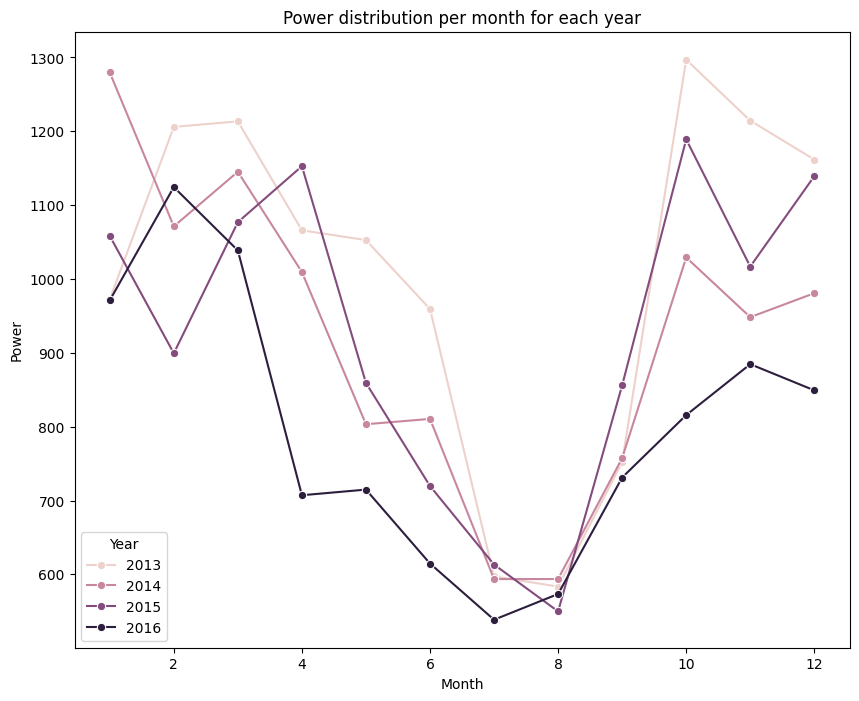

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Month",y="Power",hue="Year",marker="o",data=monthly_power)
plt.xlabel("Month")
plt.ylabel("Power")
plt.title("Power distribution per month for each year")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  140160 non-null  int64         
 1   Time        140160 non-null  datetime64[ns]
 2   Location    140160 non-null  int64         
 3   Temp_2m     140160 non-null  float64       
 4   RelHum_2m   140160 non-null  float64       
 5   DP_2m       140160 non-null  float64       
 6   WS_10m      140160 non-null  float64       
 7   WS_100m     140160 non-null  float64       
 8   WD_10m      140160 non-null  float64       
 9   WD_100m     140160 non-null  float64       
 10  WG_10m      140160 non-null  float64       
 11  Power       140160 non-null  float64       
 12  Date        140160 non-null  datetime64[ns]
 13  Hour        140160 non-null  int32         
 14  Year        140160 non-null  int32         
 15  Month       140160 non-null  int32         
dtypes:

In [ ]:
Time_distribution_power = df.groupby(['Hour', 'Month'])['Power'].sum().reset_index()

In [ ]:
Time_distribution_power.head()

,Hour,Month,Power
0,0,1,182.492276
1,0,2,183.206341
2,0,3,190.903359
3,0,4,165.172125
4,0,5,147.579059


In [ ]:
Time_distribution_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    288 non-null    int32  
 1   Month   288 non-null    int32  
 2   Power   288 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 4.6 KB


Text(0.5, 1.0, 'Power distribution for daily timings per month  ')

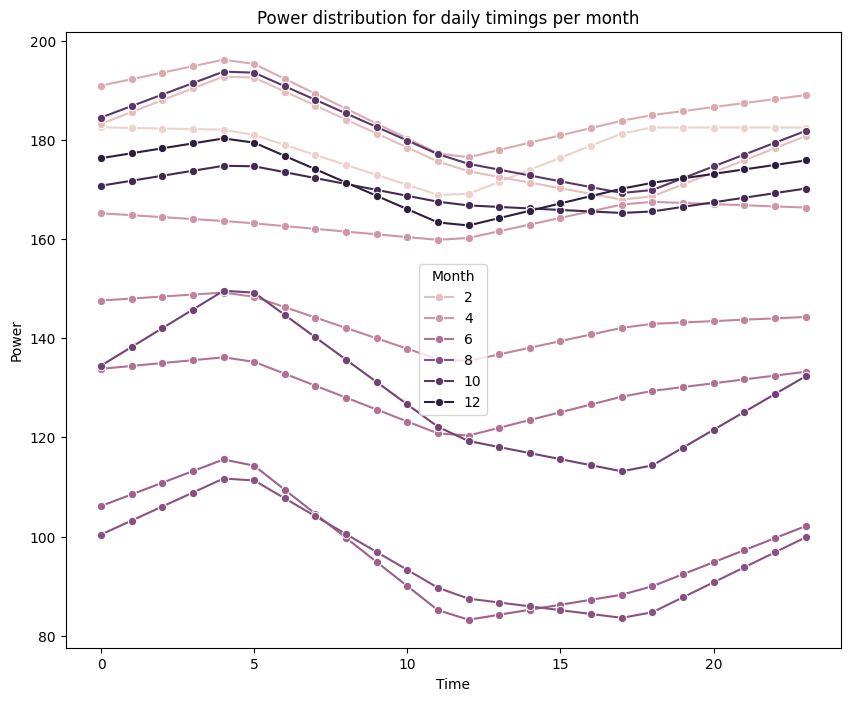

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Hour",y="Power",hue="Month",marker="o",data=Time_distribution_power)
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Power distribution for daily timings per month  ")

<Axes: xlabel='Power', ylabel='Count'>

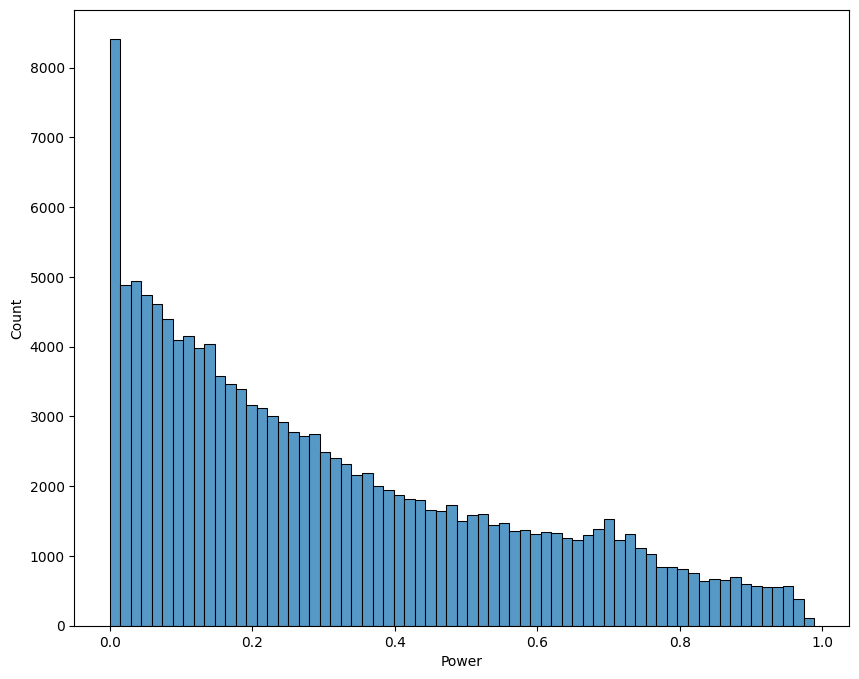

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df["Power"])

In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0,2013,1
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,2013-01-02,1,2013,1
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2013-01-02,2,2013,1
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,2013-01-02,3,2013,1
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,2013-01-02,4,2013,1


In [ ]:
df["Location"].unique()

array([1, 2, 3, 4])

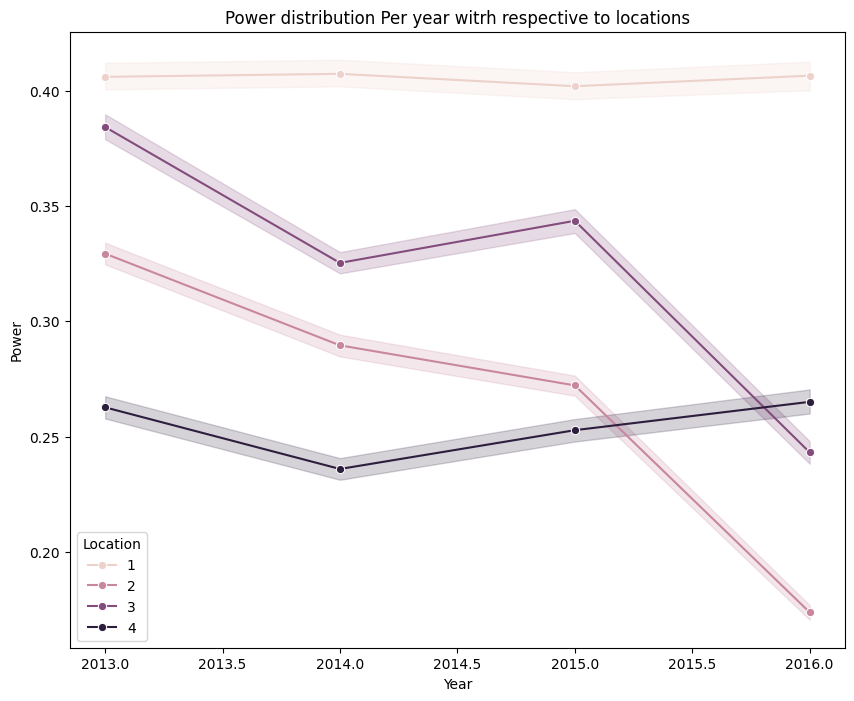

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Year",y="Power",hue="Location",marker='o',data=df)
plt.xlabel("Year")
plt.ylabel("Power")
plt.title("Power distribution Per year witrh respective to locations")
plt.show()

<Axes: >

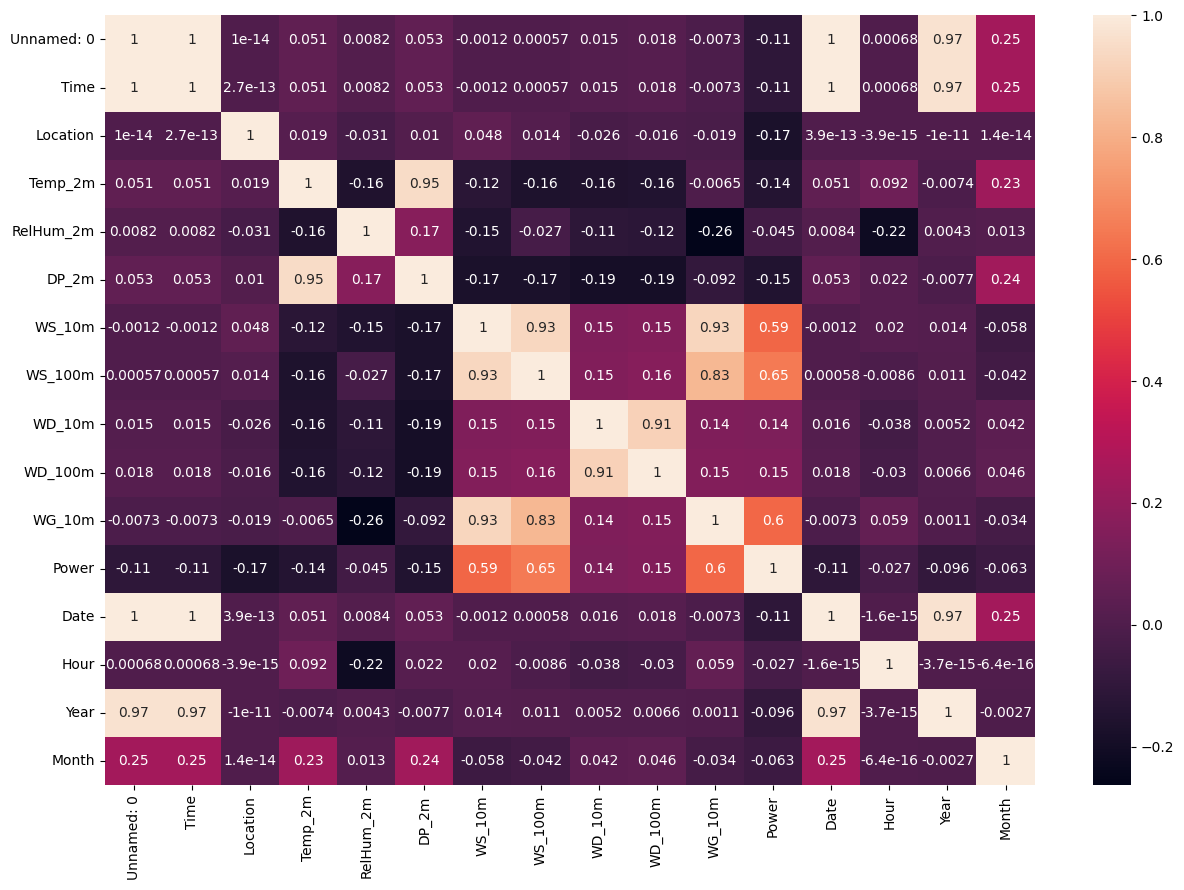

In [ ]:
plt.figure(figsize=(15,10)),
sns.heatmap(df.corr(),annot=True)

# **From the above heatmap we see that the Wind Speed and Wind Gust has a positive colinearity with the power generation.**

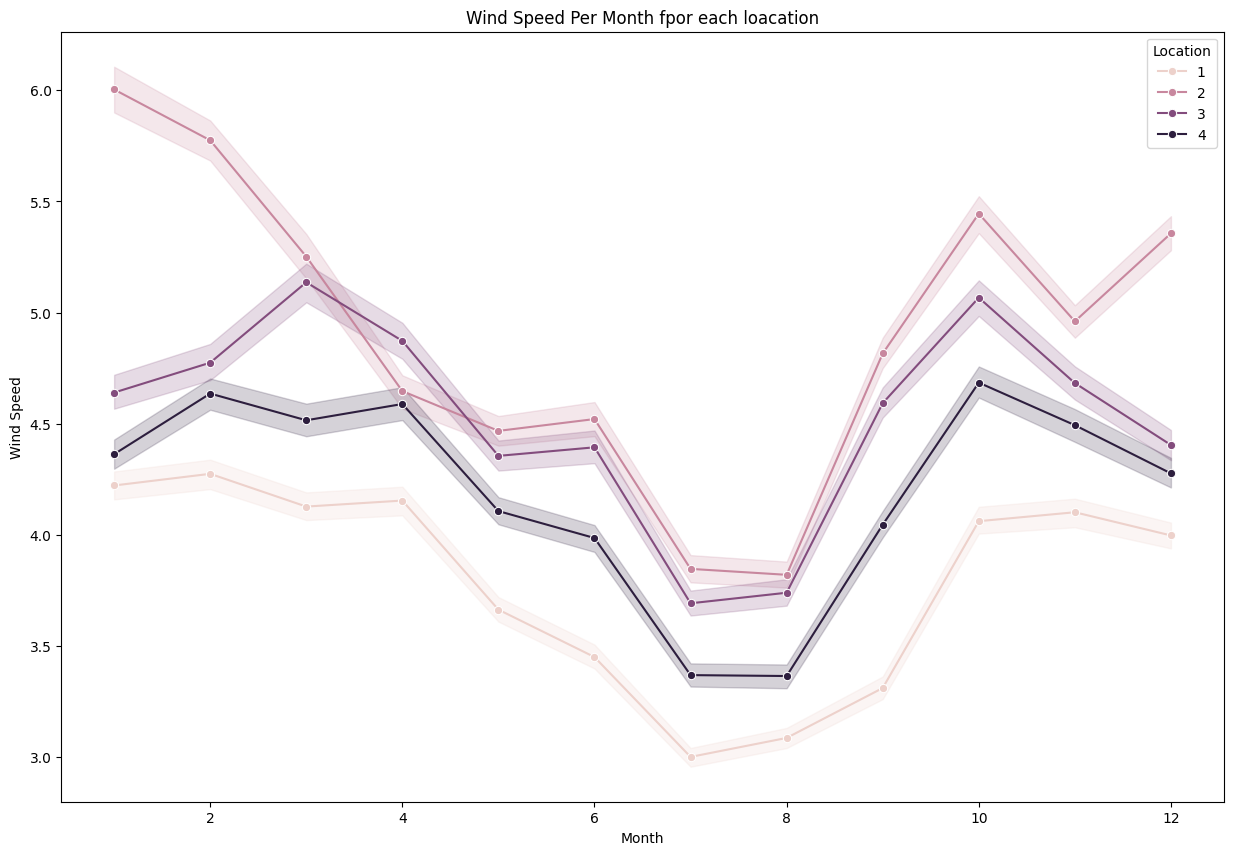

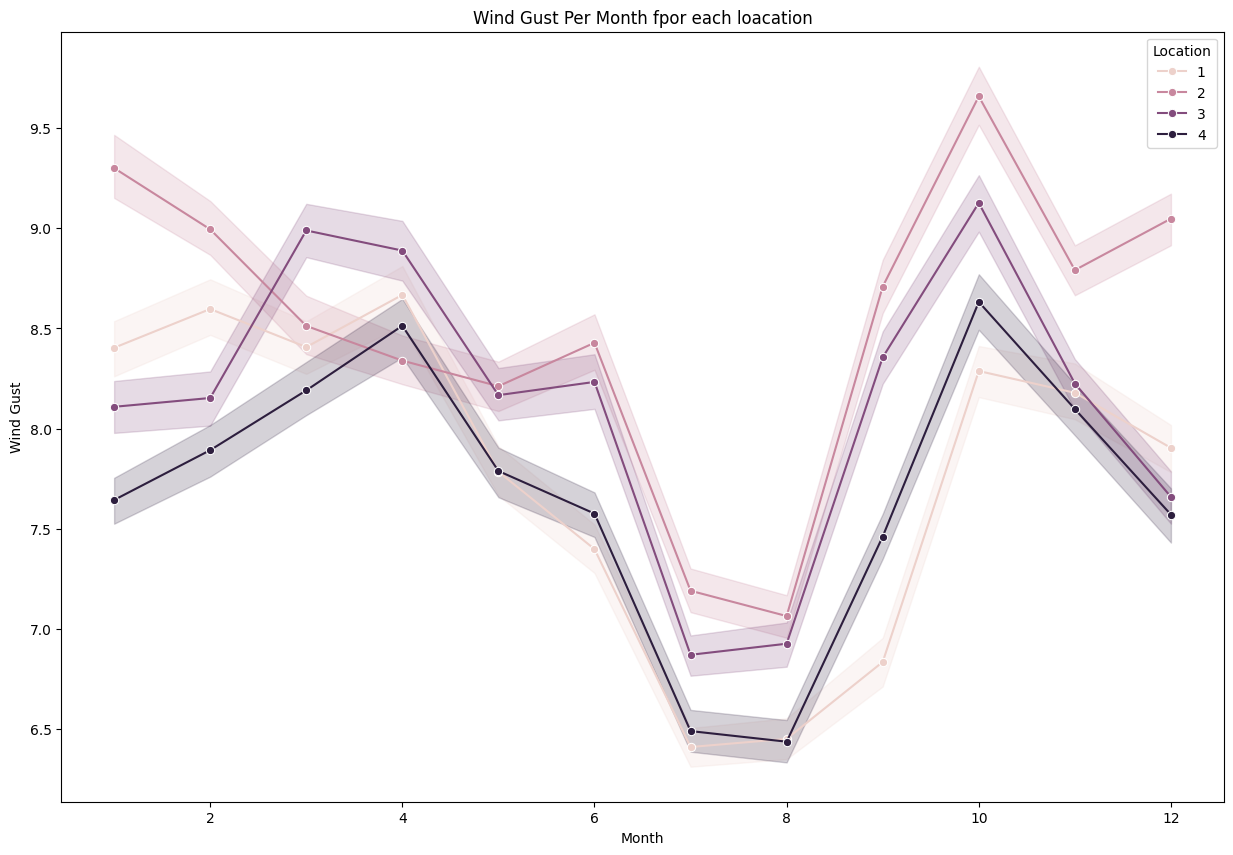

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month",y="WS_10m",marker="o",hue="Location",data=df)
plt.xlabel("Month")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Per Month fpor each loacation")
plt.show()

plt.figure(figsize=(15,10))
sns.lineplot(x="Month",y="WG_10m",marker="o",hue="Location",data=df)
plt.xlabel("Month")
plt.ylabel("Wind Gust")
plt.title("Wind Gust Per Month fpor each loacation")
plt.show()

# **From the above graph we understood that the wind speed and Wind Gust is less in July and August month which explains the reason of Power Geeration.**

In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0,2013,1
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,2013-01-02,1,2013,1
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2013-01-02,2,2013,1
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,2013-01-02,3,2013,1
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,2013-01-02,4,2013,1


In [ ]:
print(df["WS_10m"].mean())
print(df["WS_100m"].mean())
print(df["WG_10m"].mean())

4.352948387047303
6.924277727968915
8.02767303523265


# Statistical Tests to see How the variance and the mean differs.

1.Levine test to the how the variance differs
2.Two Sample t Test to see how the mean differs

***LEVINE TEST-***
Data is divided into two groups for using the mean value for WG_10m ,WG_100m and WG-10m colums and Levine test on these two samples will show theere is variance present or not for these two samples.
The test will prove if there is any variation in Power generation for these two samples for this dataset.

***Null Hypotheis***-There is no difference in varinace.
***Alternative Hypothesis***- There is difference in variance.

***TWO SAMPLE T TEST-***
Two Sample t Test is also done foe these same two samples to understand if there is any significant difference between the means of the two samples.

***Null Hypothesis***-There is no significant difference between the means.
***Alternative Hypothesis***- There is a significant between the means.

In [ ]:
df_windspeed_above_mean=df[df["WS_10m"]>4.35]
df_windspeed_below_mean=df[df["WS_10m"]<4.35]

df_windspeed_100_above_mean=df[df["WS_100m"]>6.92]
df_windspeed_100_below_mean=df[df["WS_100m"]<6.92]

df_windgust_above_mean=df[df["WG_10m"]>8.02]
df_windgust_below_mean=df[df["WG_10m"]>8.02]

In [ ]:
df_windspeed_above_mean.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month
46,46,2013-01-03 22:00:00,1,34.7796,98.664205,34.372595,5.015389,8.147799,277.051683,280.057315,9.136515,0.530596,2013-01-03,22,2013,1
47,47,2013-01-03 23:00:00,1,33.7796,96.664205,32.772595,6.035389,10.417799,283.051683,285.057315,11.636515,0.590496,2013-01-03,23,2013,1
48,48,2013-01-04 00:00:00,1,33.4796,94.664205,31.872595,5.005389,8.327799,287.051683,289.057315,12.036515,0.650396,2013-01-04,0,2013,1
49,49,2013-01-04 01:00:00,1,32.3796,94.664205,30.772595,6.115389,10.117799,277.051683,278.057315,11.636515,0.710296,2013-01-04,1,2013,1
50,50,2013-01-04 02:00:00,1,32.0796,92.664205,30.172595,6.015389,9.937799,277.051683,278.057315,11.936515,0.770196,2013-01-04,2,2013,1


In [ ]:
import scipy.stats as  sstats

In [ ]:
stats,p_value_windspeed_10m=sstats.levene(df_windspeed_above_mean["Power"],df_windspeed_below_mean["Power"])
print("Levene Test P value is ",p_value_windspeed_10m)

if p_value_windspeed_10m<0.05:
  print("Reject Null Hypotheis ")
else:
  print("Accept Null Hypothsis")

Levene Test P value is  0.0
Reject Null Hypotheis 


The above result shows that there is there is variance present between two datasets.

In [ ]:
stats,p_value_windspeed_100m=sstats.levene(df_windspeed_100_above_mean["Power"],df_windspeed_100_below_mean["Power"])
print("Levene Test P value is ",p_value_windspeed_100m)

if (p_value_windspeed_100m<0.05):
  print("Reject Null Hypotheis ")
else:
  print("Accept Null Hypothsis")

Levene Test P value is  0.0
Reject Null Hypotheis 


The result also same for in case of Winspeed_100m feature ,it implies the below above mean values there is variance present.

In [ ]:
stats,p_value_windgust=sstats.levene(df_windgust_above_mean["Power"],df_windgust_below_mean["Power"])
print("Levene Test P value is ",p_value_windgust)

if (p_value_windgust<0.05):
  print("Reject Null Hypotheis ")
else:
  print("Accept Null Hypothsis")

Levene Test P value is  1.0
Accept Null Hypothsis


In case of Windgust the it is seen that below and above the mean the variance is not present so the power values are no so much far away rom the mean.

Two Sample T Test to understand the means are significcaly different or not

In [ ]:
t_stat,p_value_windspeed_10=sstats.ttest_ind(df_windspeed_above_mean["Power"],df_windspeed_below_mean["Power"])
print("Two Sample ttest P value is ",p_value_windspeed_10)

if (p_value_windspeed_10<0.05):
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypotheis")

Two Sample ttest P value is  0.0
Reject Null Hypothesis


 Here the test implies there is significant difference betwwen the means


In [ ]:
print(df_windspeed_above_mean["Power"].mean())
print(df_windspeed_below_mean["Power"].mean())

0.46206689152598784
0.19284879498241334


In [ ]:
t_stat,p_value_windspeed_100=sstats.ttest_ind(df_windspeed_100_above_mean["Power"],df_windspeed_100_below_mean["Power"])
print("Two Sample ttest P value is ",p_value_windspeed_100)

if (p_value_windspeed_100<0.05):
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypotheis")

Two Sample ttest P value is  0.0
Reject Null Hypothesis


In Case for Windspeed_100m the mean is significantly different foe below and above mean value.

In [ ]:

t_stat,p_value_windgust=sstats.ttest_ind(df_windgust_above_mean["Power"],df_windgust_below_mean["Power"])
print("Two Sample ttest P value is ",p_value_windgust)

if (p_value_windgust<0.05):
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypotheis")

Two Sample ttest P value is  1.0
Accept Null Hypotheis


For wind gust the means are not different hence accepeting the null hypothesis.

In [ ]:
df["WS_10m"].max()

18.69538917

# Anova Test to see is there any signficant difference in power generation for different categories of wind speed

In [ ]:
df["WS_10m"].min()

0.165389169

In [ ]:
df["Wind_speed_category"]=pd.cut(df["WS_10m"],bins=[0,6,12,18,np.inf],labels=["Low","Medium","High","Very High"])

In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month,Wind_speed_category
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0,2013,1,Low
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,2013-01-02,1,2013,1,Low
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2013-01-02,2,2013,1,Low
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,2013-01-02,3,2013,1,Low
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,2013-01-02,4,2013,1,Low


In [ ]:
Low_windspeed=df[df["Wind_speed_category"]=="Low"]["Power"]
Medium_windspeed=df[df["Wind_speed_category"]=="Medium"]["Power"]
High_windspeed=df[df["Wind_speed_category"]=="High"]["Power"]
Very_High_windspeed=df[df["Wind_speed_category"]=="Very High"]["Power"]


In [ ]:
f_stat, p_value_annova = sstats.f_oneway(Low_windspeed, Medium_windspeed, High_windspeed, Very_High_windspeed)
print("Annova test p_value is ",p_value_annova )

if p_value_annova<0.05:
  print("Reject Null Hypothesis : There is a significant differenece in means")
else:
  print("Accept Null Hypothesis : There is no significant difference in means")

Annova test p_value is  0.0
Reject Null Hypothesis : There is a significant differenece in means


In [ ]:
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Date,Hour,Year,Month,Wind_speed_category
0,0,2013-01-02 00:00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,2013-01-02,0,2013,1,Low
1,1,2013-01-02 01:00:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,2013-01-02,1,2013,1,Low
2,2,2013-01-02 02:00:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2013-01-02,2,2013,1,Low
3,3,2013-01-02 03:00:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,2013-01-02,3,2013,1,Low
4,4,2013-01-02 04:00:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,2013-01-02,4,2013,1,Low


In [ ]:
df.columns

Index(['Unnamed: 0', 'Time', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m',
       'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m', 'Power', 'Date',
       'Hour', 'Year', 'Month', 'Wind_speed_category'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [ ]:
x=df[[ 'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m']]
y=df["Power"]

In [ ]:
dl=pd.read_csv("Test.csv")

In [ ]:
dl.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,35040,01-01-2017 00:00,1,19.6796,89.664205,17.072595,1.085389,0.867799,192.051683,233.057315,1.636515
1,35041,01-01-2017 01:00,1,19.1796,90.664205,16.672595,1.665389,1.907799,183.051683,197.057315,2.736515
2,35042,01-01-2017 02:00,1,19.5796,88.664205,16.672595,1.845389,2.867799,162.051683,167.057315,2.736515
3,35043,01-01-2017 03:00,1,20.3796,85.664205,16.572595,2.325389,3.987799,166.051683,161.057315,2.936515
4,35044,01-01-2017 04:00,1,21.0796,82.664205,16.572595,2.265389,4.047799,182.051683,170.057315,3.136515


In [ ]:
x_test_data=df[[ 'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_test)

In [ ]:
train_pred

array([0.33830915, 0.3076506 , 0.26547015, ..., 0.16687854, 0.3608656 ,
       0.24317929])

In [ ]:
test_prediction=lr.predict(x_test_data)

In [ ]:
test_prediction

array([-0.11118895,  0.15052442,  0.08615536, ...,  0.21724948,
        0.34486008,  0.32926092])

In [ ]:
mean_squre_traning=mean_squared_error(y_test,train_pred)
r2 = r2_score(y_test, train_pred)
print('The mean squre for the traning data is ',mean_squre_traning)
print('The r2 score for the traning data is ',r2)

The mean squre for the traning data is  0.03490296194073635
The r2 score for the traning data is  0.4572424124210014


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)
pred_random_forest=rf_model.predict(x_test)

In [ ]:
mean_squre_random=mean_squared_error(y_test,pred_random_forest)
r2_random = r2_score(y_test, pred_random_forest)
print('The mean squre for the traning data is ',mean_squre_random)
print('The r2 score for the traning data is ',r2_random)

The mean squre for the traning data is  0.031585765241582776
The r2 score for the traning data is  0.5088263920561586


In [ ]:
pred_random_forest_testing=rf_model.predict(x_test_data)

In [ ]:
pred_random_forest_testing


array([0.14866689, 0.13039989, 0.10520789, ..., 0.19906889, 0.19982689,
       0.21143489])

Linear Regression Random Forest model is applied on the data and is seen that Random Forest has better R2 score than Linear Regression Model.

Now polynomial regression is also apllied on this dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly

In [ ]:
polynomial=poly(degree=3)
x_poly_train=polynomial.fit_transform(x_train)
x_poly_test=polynomial.fit_transform(x_test)

poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)
poly_pred=poly_model.predict(x_poly_test)


In [ ]:
poly_pred

array([0.35699472, 0.33150955, 0.26441508, ..., 0.15251427, 0.3803957 ,
       0.17922154])

In [ ]:
mean_squre_poly=mean_squared_error(y_test,poly_pred)
r2_poly = r2_score(y_test, poly_pred)
print('The mean squre for the traning data is ',mean_squre_poly)
print('The r2 score for the traning data is ',r2_poly)

The mean squre for the traning data is  0.03188542804140318
The r2 score for the traning data is  0.5041664936041632


Also Applying ElasticNet regressio

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net_model=ElasticNet(alpha=0.1,l1_ratio=0.1)
elastic_net_model.fit(x_train,y_train)
elastic_Net_pred=elastic_net_model.predict(x_test)

In [ ]:
elastic_Net_pred

array([0.34232591, 0.3146283 , 0.29156356, ..., 0.19496467, 0.29944302,
       0.20152071])

In [ ]:
mean_squre_elastic=mean_squared_error(y_test,elastic_Net_pred)
r2_elastic = r2_score(y_test,elastic_Net_pred)
print('The mean squre for the traning data is ',mean_squre_elastic)
print('The r2 score for the traning data is ',r2_elastic)

The mean squre for the traning data is  0.03644196365198181
The r2 score for the traning data is  0.4333102069682422


Among all the models random forest gives a high R2 score